In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline
sns.set(style="whitegrid")

# Veri setini yükleme
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length","sepal_width","petal_length","petal_width","species"]
df = pd.read_csv(url, names=columns)

df.head()
df.describe()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/tmp/ipython-input-3625398827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='Set2')


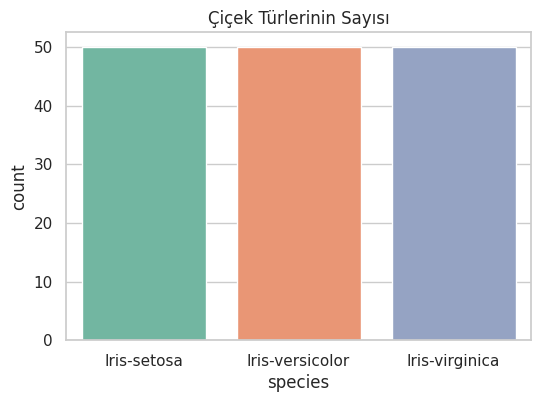

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df, palette='Set2')
plt.title("Çiçek Türlerinin Sayısı")
plt.show()

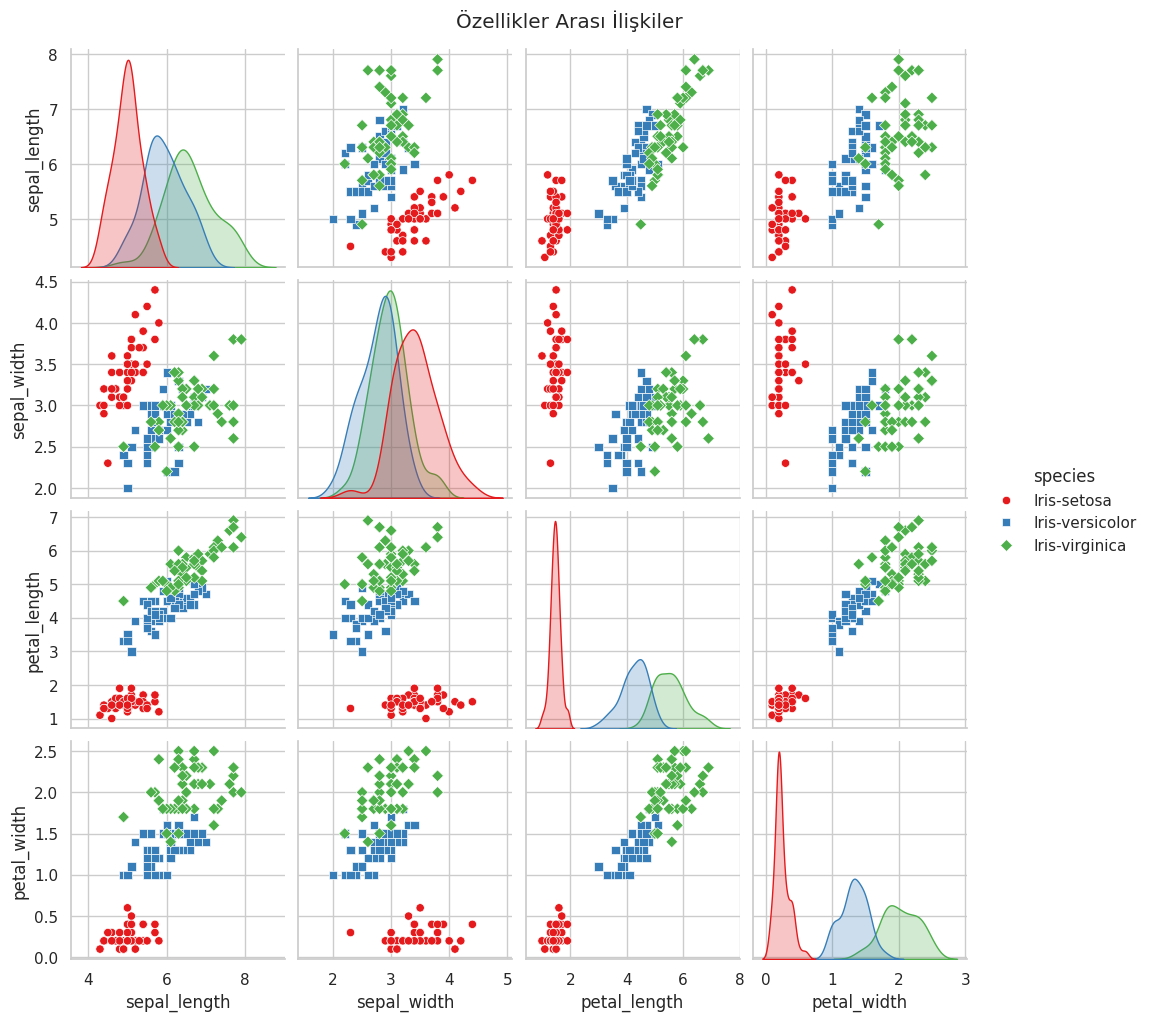

In [ ]:
sns.pairplot(df, hue='species', palette='Set1', markers=["o","s","D"])
plt.suptitle("Özellikler Arası İlişkiler", y=1.02)
plt.show()


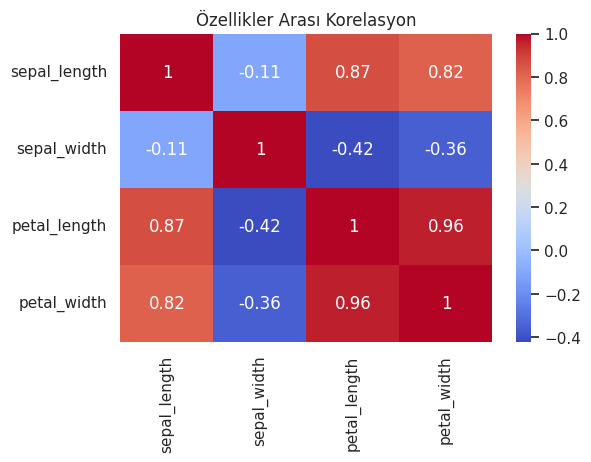

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm")
plt.title("Özellikler Arası Korelasyon")
plt.show()


In [ ]:
X = df.iloc[:, :-1]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

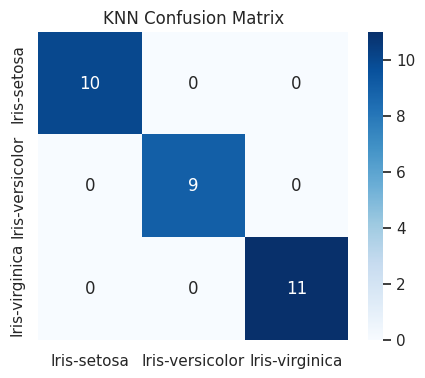

Iris-setosa -> TP: 10, FP: 0, FN: 0, TN: 20
Iris-versicolor -> TP: 9, FP: 0, FN: 0, TN: 21
Iris-virginica -> TP: 11, FP: 0, FN: 0, TN: 19

KNN Metrics -> Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Modeli oluştur ve eğit
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Tahmin
y_pred_knn = knn.predict(X_test)

# Confusion matrix
classes = df['species'].unique()
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=classes)

# Görselleştirme
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

# Her sınıf için TP, FP, FN, TN
for i, cls in enumerate(classes):
    TP = cm_knn[i, i]
    FP = cm_knn[:, i].sum() - TP
    FN = cm_knn[i, :].sum() - TP
    TN = cm_knn.sum() - (TP + FP + FN)
    print(f"{cls} -> TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

# Accuracy, Precision, Recall, F1
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"\nKNN Metrics -> Accuracy: {acc_knn:.4f}, Precision: {prec_knn:.4f}, Recall: {rec_knn:.4f}, F1: {f1_knn:.4f}")


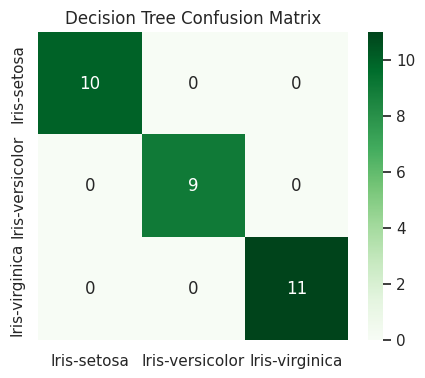

Iris-setosa -> TP: 10, FP: 0, FN: 0, TN: 20
Iris-versicolor -> TP: 9, FP: 0, FN: 0, TN: 21
Iris-virginica -> TP: 11, FP: 0, FN: 0, TN: 19

Decision Tree Metrics -> Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
# Modeli oluştur ve eğit
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Tahmin
y_pred_dt = dt.predict(X_test)

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=classes)

# Görselleştirme
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Her sınıf için TP, FP, FN, TN
for i, cls in enumerate(classes):
    TP = cm_dt[i, i]
    FP = cm_dt[:, i].sum() - TP
    FN = cm_dt[i, :].sum() - TP
    TN = cm_dt.sum() - (TP + FP + FN)
    print(f"{cls} -> TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

# Accuracy, Precision, Recall, F1
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
rec_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"\nDecision Tree Metrics -> Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {rec_dt:.4f}, F1: {f1_dt:.4f}")


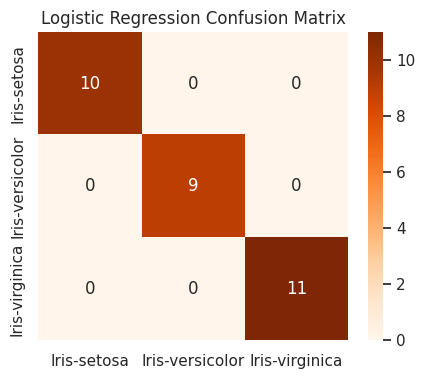

Iris-setosa -> TP: 10, FP: 0, FN: 0, TN: 20
Iris-versicolor -> TP: 9, FP: 0, FN: 0, TN: 21
Iris-virginica -> TP: 11, FP: 0, FN: 0, TN: 19

Logistic Regression Metrics -> Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
# Modeli oluştur ve eğit
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Tahmin
y_pred_lr = lr.predict(X_test)

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=classes)

# Görselleştirme
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Oranges")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Her sınıf için TP, FP, FN, TN
for i, cls in enumerate(classes):
    TP = cm_lr[i, i]
    FP = cm_lr[:, i].sum() - TP
    FN = cm_lr[i, :].sum() - TP
    TN = cm_lr.sum() - (TP + FP + FN)
    print(f"{cls} -> TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

# Accuracy, Precision, Recall, F1
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='weighted')
rec_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"\nLogistic Regression Metrics -> Accuracy: {acc_lr:.4f}, Precision: {prec_lr:.4f}, Recall: {rec_lr:.4f}, F1: {f1_lr:.4f}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metricleri toplama
models = ["KNN", "Decision Tree", "Logistic Regression"]
accuracy_list = [acc_knn, acc_dt, acc_lr]
precision_list = [prec_knn, prec_dt, prec_lr]
recall_list = [rec_knn, rec_dt, rec_lr]
f1_list = [f1_knn, f1_dt, f1_lr]

# Tablo oluştur
comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1-Score": f1_list
})

print("Modellerin Karşılaştırması:\n")
print(comparison_df)


Modellerin Karşılaştırması:

                 Model  Accuracy  Precision  Recall  F1-Score
0                  KNN       1.0        1.0     1.0       1.0
1        Decision Tree       1.0        1.0     1.0       1.0
2  Logistic Regression       1.0        1.0     1.0       1.0


/tmp/ipython-input-1985139821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="Set2")


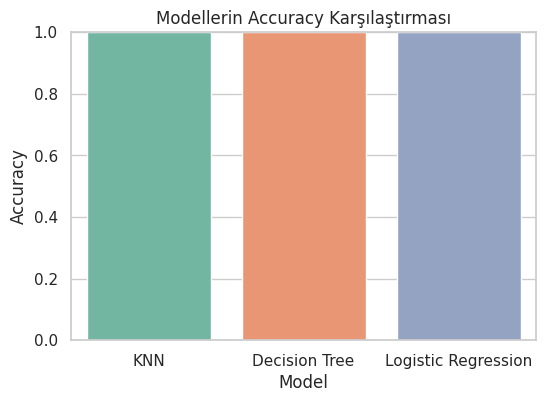

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="Set2")
plt.ylim(0,1)
plt.title("Modellerin Accuracy Karşılaştırması")
plt.show()


/tmp/ipython-input-1994581431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=comparison_df, palette="Set3")


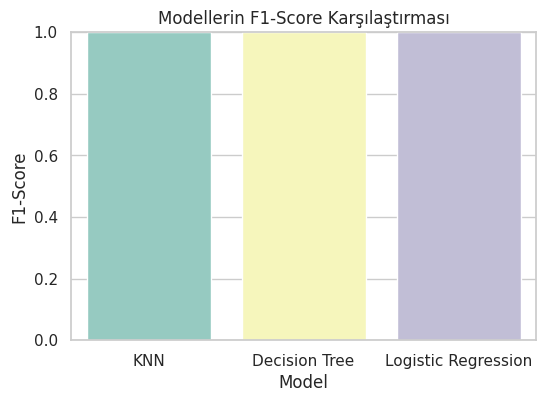

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="F1-Score", data=comparison_df, palette="Set3")
plt.ylim(0,1)
plt.title("Modellerin F1-Score Karşılaştırması")
plt.show()


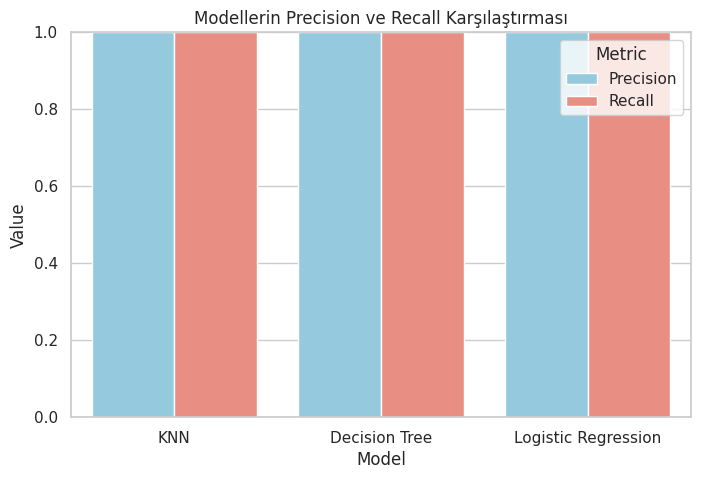

In [ ]:
comparison_melted = comparison_df.melt(id_vars="Model", value_vars=["Precision","Recall"], var_name="Metric", value_name="Value")

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Value", hue="Metric", data=comparison_melted, palette=["skyblue","salmon"])
plt.ylim(0,1)
plt.title("Modellerin Precision ve Recall Karşılaştırması")
plt.show()
